In [4]:
# Installation des dépendances pour Colab
!pip install scipy matplotlib numpy

import importlib
import sys
import os
from google.colab import files

# Upload des fichiers si nécessaire
print("Veuillez uploader les fichiers versDV.py et deviatoire.py")
# uploaded = files.upload()  # Décommentez cette ligne pour uploader les fichiers

# Ajout du répertoire courant au path Python
sys.path.append('.')

# Import des modules
try:
    import versDV as dv
    import deviatoire as dev
    print("Modules importés avec succès!")
except ImportError as e:
    print(f"Erreur d'import: {e}")
    print("Assurez-vous d'avoir uploadé les fichiers versDV.py et deviatoire.py")

from math import pi, sin, cos
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(dv)
importlib.reload(dev)

Current working directory: /content
Files in current dir: ['.config', 'sample_data']
Attempting to change to: /root/DangVan/old
Directory exists: False


FileNotFoundError: [Errno 2] No such file or directory: '/root/DangVan/old'

In [ ]:

points1 = dv.nuage(100, 2*dv.pi, 0.01, 1)
points2 = dv.nuageOrt(100, 2*dv.pi, 0.01, 1)
    

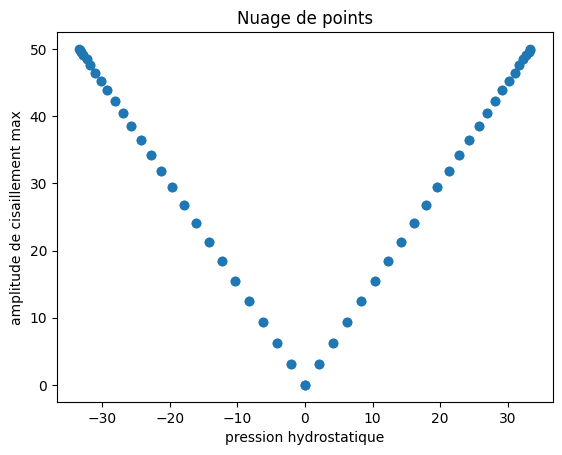

In [ ]:
dv.traceNuage(points1)

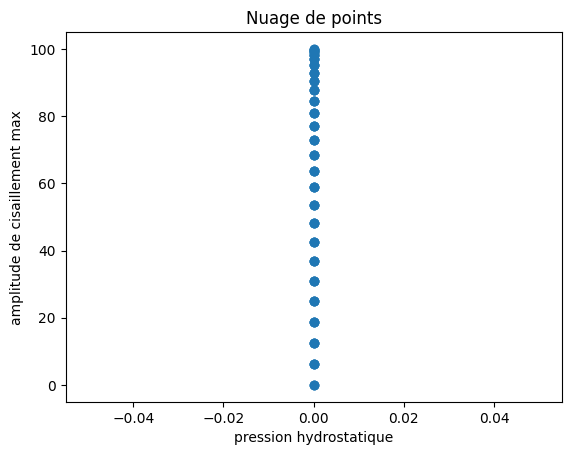

In [ ]:
dv.traceNuage(points2)


In [ ]:
matTens=dv.load_tens_from_csv('./datas/tensors_torsion.csv')
matDev=dev.CalculMatDev(matTens)


In [ ]:
dv.hydro(matTens[0]),matTens[0]

(0.0, array([  0.,   0.,   0., 100.,   0.,   0.]))

In [ ]:
dev.deviateur(matTens[0])


array([  0.,   0., 100.,   0.,   0.])

In [ ]:
dev.diametre(matTens)

(346.41016151377545,
 array([  0.,   0., 100.,   0.,   0.]),
 array([   0.,    0., -100.,    0.,    0.]))

In [ ]:
Rec,centre=dev.recentre(matTens)
pointsJ2=np.array([dev.normeJ2(Rec[i]) for i in range(Rec.shape[0])]).T
pointsTresca=np.array([dev.normeTresca(Rec[i]) for i in range(Rec.shape[0])]).T
# points3= np.vstack((points3, dv.hydro(Rec)))

points4=np.array([dv.hydro(matTens[i]) for i in range(matTens.shape[0])]).T


In [ ]:
centre


array([0., 0., 0., 0., 0.])

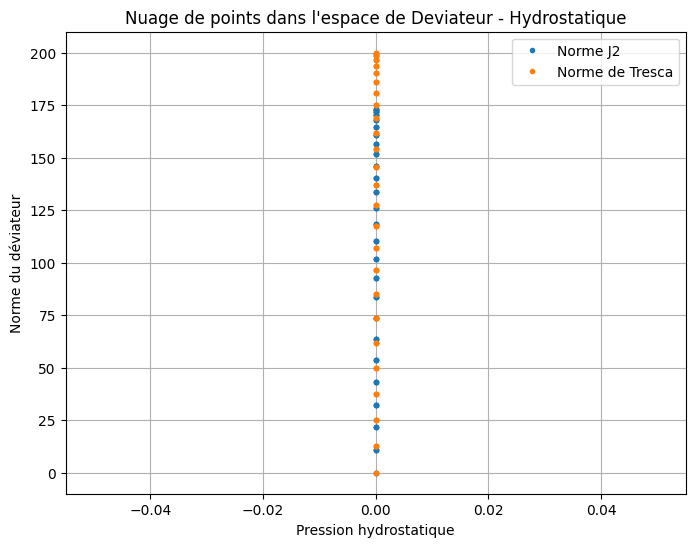

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(points4, pointsJ2,'.',label="Norme J2")
plt.plot(points4, pointsTresca,'.',label="Norme de Tresca")
plt.legend()
plt.ylabel("Norme du déviateur")
plt.xlabel("Pression hydrostatique")
plt.title("Nuage de points dans l'espace de Deviateur - Hydrostatique")
plt.grid()
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
/tmp/ipykernel_17771/944321602.py:10: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(points4.min(), points4.max())


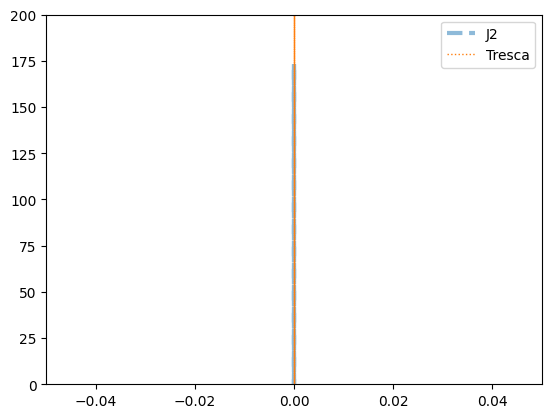

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln, = ax.plot([], [], '--', label='J2',linewidth=3)
ln1, = ax.plot([], [], ':', label='Tresca',linewidth=1)

def init():
    ax.set_xlim(points4.min(), points4.max())
    ax.set_ylim(min(pointsJ2.min(), pointsTresca.min()), max(pointsJ2.max(), pointsTresca.max()))
    ln.set_alpha(.5)
    ln1.set_alpha(1)
    ax.legend()
    return ln, ln1


def update(frame):
    xdata = points4[:frame]
    ydata = pointsJ2[:frame]
    ln.set_data(xdata, ydata)
    ydata_t = pointsTresca[:frame]
    ln1.set_data(xdata, ydata_t)
    return ln, ln1
ani = FuncAnimation(fig, update, frames=range(1, len(points4)+1),
                    init_func=init, blit=False)
ani.save("test.gif")
